In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,classification_report
import pickle
from sklearn.preprocessing import LabelEncoder

In [28]:
loan = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Loan_Prediction\Dataset\Loan_Prediction.csv')

In [29]:
loan.shape

(614, 13)

In [30]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


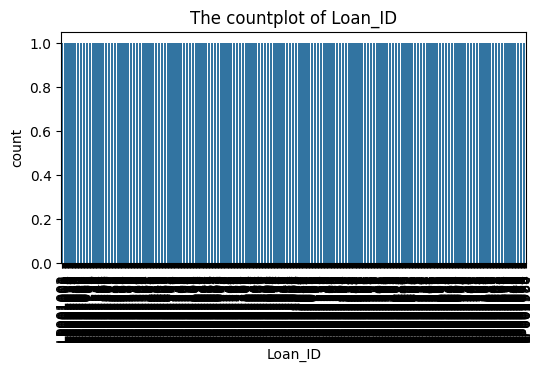

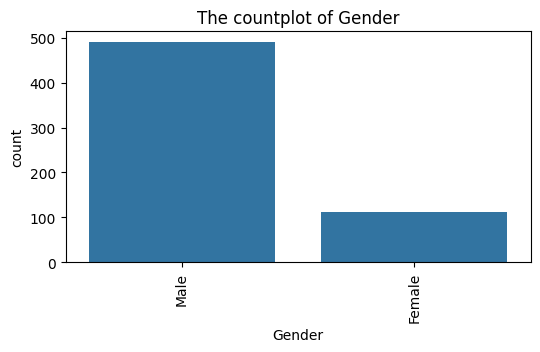

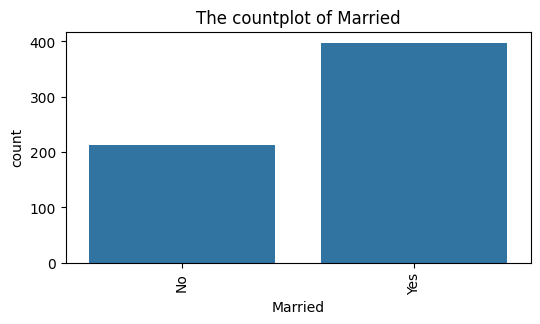

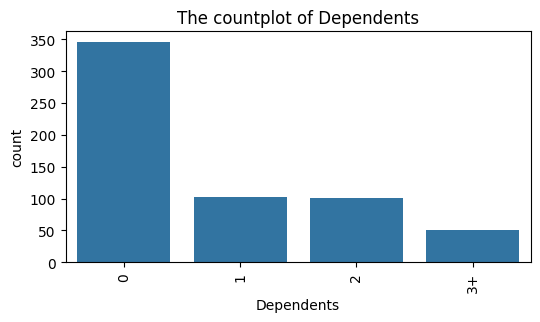

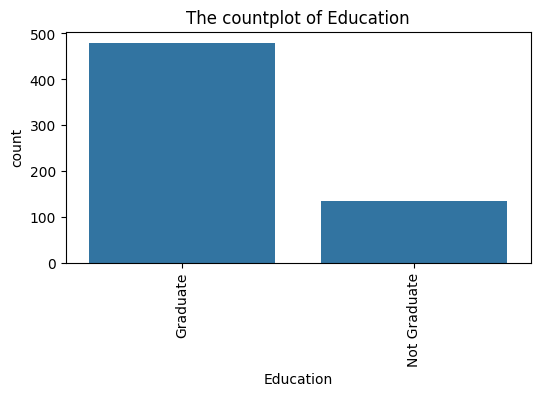

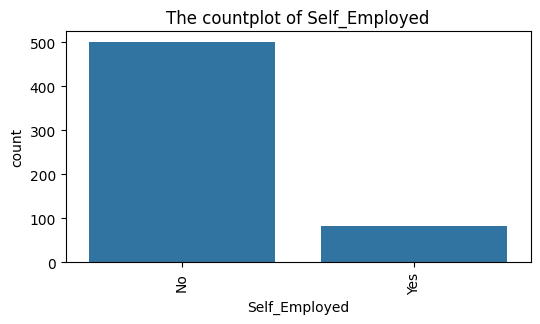

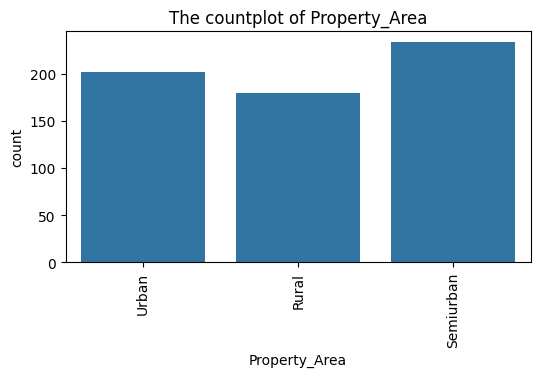

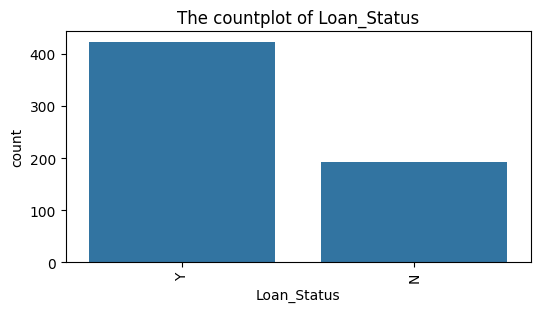

In [32]:
# List of features for which we want to create count plots
features = loan.select_dtypes(include = ['object']).columns
# Loop through each feature in the list
for i, feature in enumerate(features):
    # Create a new figure with specified size
    plt.figure(figsize=(6, 3))
    
    # Create a count plot for the current feature
    sns.countplot(x=feature, data=loan)
    
    # Set the title of the plot
    plt.title(f'The countplot of {feature}')
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

In [33]:
loan['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [34]:
loan['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [35]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)
loan.drop(['Loan_ID'], axis=1, inplace=True)
loan.dropna(inplace=True)

In [37]:
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 611, dtype: bool

In [39]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [46]:
loan_encoded = pd.get_dummies(loan, columns=['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area', 'Education'], drop_first=True)
loan_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,5849,0.0,146.412162,360.0,1.0,Y,True,False,False,False,False,False,False,True,False
1,4583,1508.0,128.000000,360.0,1.0,N,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,Y,True,True,False,False,False,True,False,True,False
3,2583,2358.0,120.000000,360.0,1.0,Y,True,True,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,Y,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y,False,False,False,False,False,False,False,False,False
610,4106,0.0,40.000000,180.0,1.0,Y,True,True,False,False,True,False,False,False,False
611,8072,240.0,253.000000,360.0,1.0,Y,True,True,True,False,False,False,False,True,False
612,7583,0.0,187.000000,360.0,1.0,Y,True,True,False,True,False,False,False,True,False


In [50]:
boolean_columns = ['Gender_Male','Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
                   'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Education_Not Graduate']

# Convert boolean columns to integer (0 or 1)
loan_encoded[boolean_columns] = loan_encoded[boolean_columns].astype(int)

In [52]:
label_encoder = LabelEncoder()
loan_encoded['Loan_Status'] = label_encoder.fit_transform(loan_encoded['Loan_Status'])

In [53]:
loan_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,0,0,1,0
1,4583,1508.0,128.000000,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,0,1,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,0,0,1,0


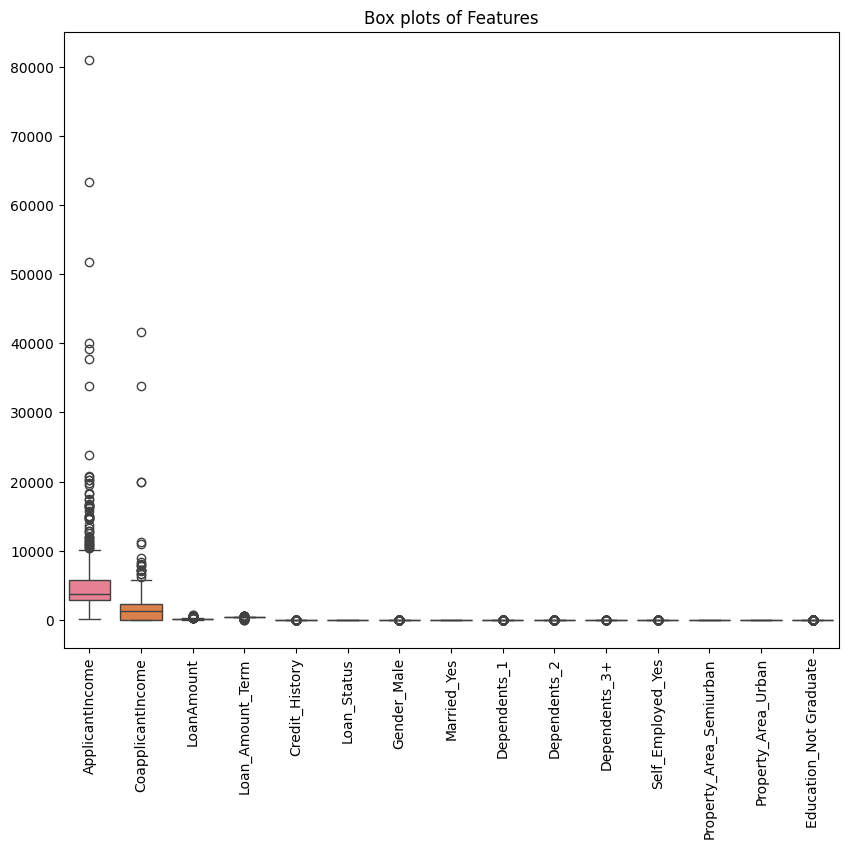

In [54]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=loan_encoded)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

In [55]:
loan_encoded['Applicantincome_winsorized'] = winsorize(loan_encoded['ApplicantIncome'], limits=[0.05, 0.05])
loan_encoded['CoapplicantIncome	_winsorized'] = winsorize(loan_encoded['CoapplicantIncome'], limits=[0.05, 0.05])
loan_encoded['LoanAmount_winsorized'] = winsorize(loan_encoded['LoanAmount'], limits=[0.05, 0.05])
loan_encoded['Loan_Amount_Term_winsorized'] = winsorize(loan_encoded['Loan_Amount_Term'], limits=[0.05, 0.05])
loan_encoded['Credit_History_winsorized'] = winsorize(loan_encoded['Credit_History'], limits=[0.05, 0.05])
loan_encoded['Gender_Male_winsorized'] = winsorize(loan_encoded['Gender_Male'], limits=[0.05, 0.05])
loan_encoded['Dependents_1_winsorized'] = winsorize(loan_encoded['Dependents_1'], limits=[0.05, 0.05])
loan_encoded['Dependents_2_winsorized'] = winsorize(loan_encoded['Dependents_2'], limits=[0.05, 0.05])
loan_encoded['Dependents_3+_winsorized'] = winsorize(loan_encoded['Dependents_3+'], limits=[0.05, 0.05])
loan_encoded['Self_Employed_Yes_winsorized'] = winsorize(loan_encoded['Self_Employed_Yes'], limits=[0.05, 0.05])
loan_encoded['Education_Not Graduate_winsorized'] = winsorize(loan_encoded['Education_Not Graduate'], limits=[0.05, 0.05])
loan_encoded.drop(['CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History',
                   'Gender_Male','Dependents_1','Dependents_2','Dependents_3+','Self_Employed_Yes','Education_Not Graduate'], axis=1, inplace=True)

In [63]:
X = loan_encoded.drop('Loan_Status', axis=1)
y=loan_encoded['Loan_Status']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 Married_Yes                          0.027672
Property_Area_Semiurban              0.029712
Property_Area_Urban                  0.025257
Applicantincome_winsorized           0.207134
CoapplicantIncome\t_winsorized       0.112901
LoanAmount_winsorized                0.198272
Loan_Amount_Term_winsorized          0.024331
Credit_History_winsorized            0.245970
Gender_Male_winsorized               0.022563
Dependents_1_winsorized              0.025160
Dependents_2_winsorized              0.017746
Dependents_3+_winsorized             0.016059
Self_Employed_Yes_winsorized         0.019683
Education_Not Graduate_winsorized    0.027539
dtype: float64


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.185, random_state=42)

In [65]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(497, 14) (114, 14) (497,) (114,)


In [66]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Train the logistic regression model
model = LogisticRegression(random_state=42)

In [68]:
# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 0.0001],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500,800, 1000, 2000, 1500, 300]
}
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best CV Accuracy: 0.8049155145929339


In [69]:
# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy_score:", accuracy_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification report", classification_report)

Confusion Matrix:
 [[14 17]
 [ 2 81]]
Accuracy_score: 0.8333333333333334
Precision: 0.826530612244898
Recall: 0.9759036144578314
F1-score: 0.8950276243093923
Classification report               precision    recall  f1-score   support

           0       0.88      0.45      0.60        31
           1       0.83      0.98      0.90        83

    accuracy                           0.83       114
   macro avg       0.85      0.71      0.75       114
weighted avg       0.84      0.83      0.81       114



In [79]:
pickle.dump(scaler, open('scalar.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))